In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error

pre-processing

In [2]:
data_df = pd.read_csv('Data\\processed.csv')

In [3]:
def get_high_cor(data, threshold = 0.2):
    cor = data.corr().stack().reset_index().drop_duplicates()
    cor.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
    high_cor = cor[((cor['FEATURE_1'] != cor['FEATURE_2'] ) & ((cor['CORRELATION'] >= threshold) | (cor['CORRELATION'] <= threshold * -1)))]
    return high_cor

In [4]:
high_cor = get_high_cor(data_df)
cor = high_cor[((high_cor['FEATURE_1'] == 'KWH'))]

In [5]:
cor

,FEATURE_1,FEATURE_2,CORRELATION
713233,KWH,TYPEHUQ,-0.352917
713236,KWH,CDD65,0.245610
713238,KWH,CDD30YR,0.256357
713240,KWH,AIA_Zone,0.200681
713242,KWH,UR,0.260477
...,...,...,...
714101,KWH,TOTALDOLWTH,0.437861
714102,KWH,TOTALDOLRFG,0.433450
714103,KWH,TOTALDOLOTH,0.655677
714107,KWH,KAVALNG,-0.275771


In [6]:
corr_list = []

for elem in cor['FEATURE_2']:
    corr_list.append(elem)

high_cor_df = data_df[data_df.columns.intersection(corr_list)]

data_df = pd.concat((high_cor_df, data_df['KWH']),axis = 1)

print(data_df)
# high_cor_df.to_csv("./Data/high_cor_df.csv", index=False)

       TYPEHUQ  CDD65  CDD30YR  AIA_Zone  UR  KOWNRENT  YEARMADE  \
0            2   1080     1271         3   0         1      2004   
1            2    199      143         4   0         2      1998   
2            5    505      829         2   0         2      1965   
3            2    672      868         2   0         1      1985   
4            3    702      797         3   0         1      1983   
...        ...    ...      ...       ...  ..       ...       ...   
12076        2    332      451         1   0         1      1985   
12077        4   2844     2286         5   0         2      1980   
12078        2    472      600         1   0         1      1993   
12079        2    770      957         2   0         1      1930   
12080        2    124      139         4   0         1      1948   

       YEARMADERANGE  NUMFLRS  ROOFTYPE  ...  TOTALBTURFG  TOTALBTUOTH  \
0                  7        0         5  ...         5171        26363   
1                  6        0      

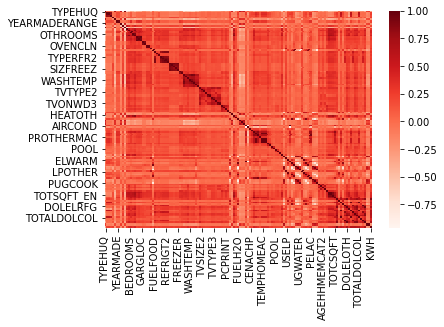

In [7]:
cor = data_df.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [8]:
X = data_df[data_df.columns.difference(['KWH'])]
Y = data_df['KWH']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state = 42)

In [9]:
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

models implementation

In [10]:
reg = LinearRegression().fit(X_train, Y_train)
print(reg.score(X_test, Y_test))
print(reg.score(X_train, Y_train))
print("\n\n")
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)
print(lasso.score(X_test, Y_test))
print(lasso.score(X_train, Y_train))

0.9776179878149662
0.9751814506648859



0.9777267974235655
0.9752586852923838
C:\Users\Daniel Ciovica\miniconda3\envs\bigdata\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5625984880.639406, tolerance: 51375337.476005666
  model = cd_fast.enet_coordinate_descent(


In [12]:
print("\n\n Train summary: \n\n")
print("\n\n R2 Score: {} ".format(reg.score(X_train, Y_train)))
y_train_pred = reg.predict(X_train)
print("\n\n MSE Score: {} ".format(mean_squared_error(Y_train, y_train_pred)))
print("\n\n MAE Score: {} ".format(mean_absolute_error(Y_train, y_train_pred)))


y_test_pred = reg.predict(X_test)
print("\n\n Test summary: \n\n")
print("\n\n R2 Test Score: {} ".format(lasso.score(X_test, Y_test)))
print("\n\n MSE Score: {} ".format(mean_squared_error(Y_test, y_test_pred)))
print("\n\n MAE Score: {} ".format(mean_absolute_error(Y_test, y_test_pred)))



 Train summary: 




 R2 Score: 0.9751814506648859 


 MSE Score: 1507877.6581792592 


 MAE Score: 743.7770881160236 


 Test summary: 




 R2 Test Score: 0.9777267974235655 


 MSE Score: 1180531.5743334622 


 MAE Score: 707.2159201430119 


In [16]:
print(y_test_pred[:10])
print(list(Y_test[:10]))

[13178.96268238  2205.88166887 30181.44825869 24835.64730757
  4174.65289651 10605.584589    3630.13760891 21038.60774772
  3054.30168067 13691.38753342]
[13796, 2467, 29209, 24099, 4501, 10469, 3997, 21627, 3101, 13540]
